In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic=sns.load_dataset("titanic")

In [2]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
titanic.shape

(891, 15)

In [15]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
survivors=titanic[titanic["survived"]==1]
death=titanic[titanic["survived"]==0]
total_survivars=survivors["survived"].count()
total_death=death["survived"].count()
total_passengers=titanic["survived"].count()
print(f"Total Survivors={total_survivars}, Mean age of survivors={survivors["age"].mean()}")
print(f"Total Death={total_death}, Mean age of death={death["age"].mean()}")
print(f"Total Passengers={total_passengers}")
print(f"Survival Ratio={round((total_survivars/total_passengers)*100,0)}%")
print(f"Death Ratio={round((total_death/total_passengers)*100,0)}%")

Total Survivors=342, Mean age of survivors=28.343689655172415
Total Death=549, Mean age of death=30.62617924528302
Total Passengers=891
Survival Ratio=38.0%
Death Ratio=62.0%


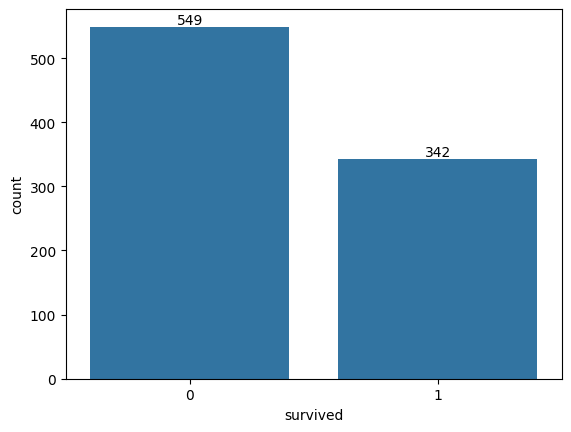

In [27]:
a=sns.countplot(x="survived", data=titanic)
plt.bar_label(a.containers[0])
plt.show()

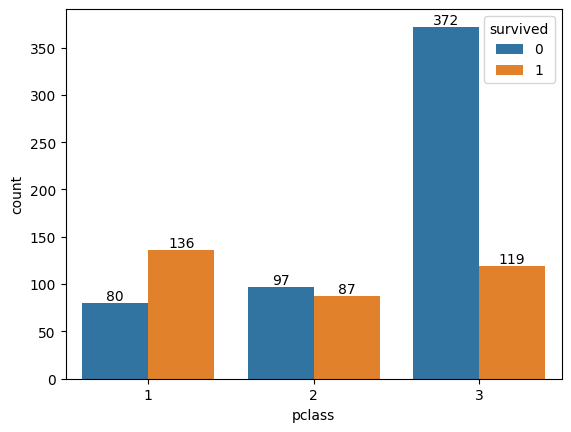

In [35]:
a=sns.countplot(data=titanic,x="pclass", hue="survived")
plt.bar_label(a.containers[0])
plt.bar_label(a.containers[1])
plt.show()

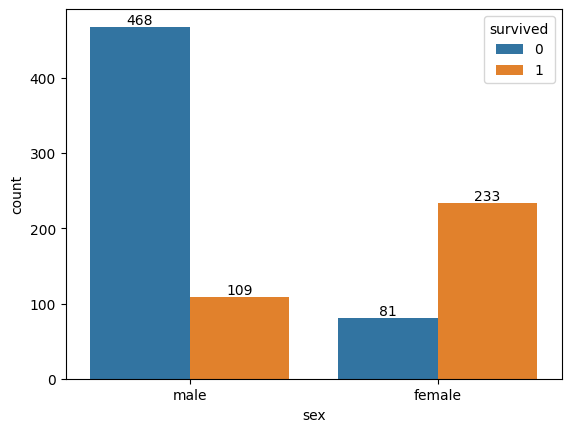

In [37]:
a=sns.countplot(data=titanic,x="sex", hue="survived")
for container in a.containers:
    plt.bar_label(container)
plt.show()

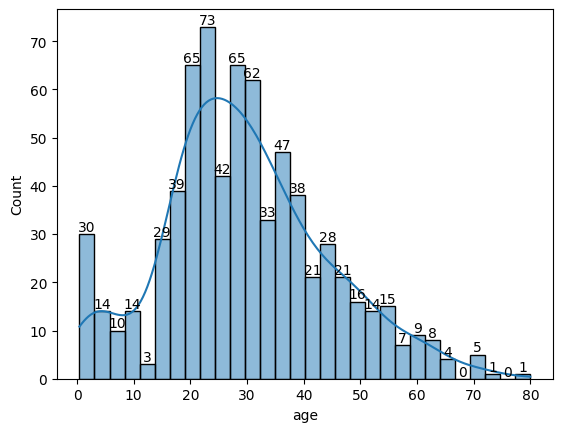

In [43]:
a=sns.histplot(titanic,x="age", bins=30, kde=True)
plt.bar_label(a.containers[0])
plt.show()

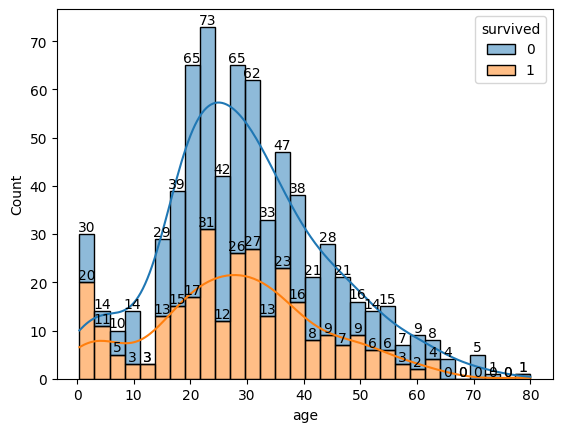

In [47]:
a=sns.histplot(data=titanic, x="age", hue="survived", bins=30, kde=True, multiple="stack")
plt.bar_label(a.containers[0])
plt.bar_label(a.containers[1])
plt.show()

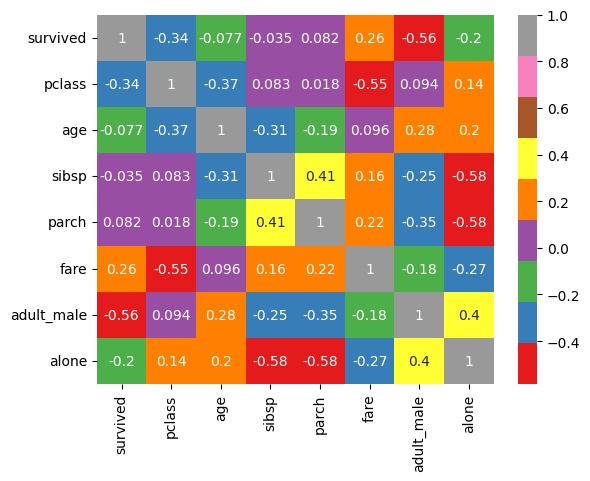

In [55]:
corr = titanic.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="Set1")
plt.show()

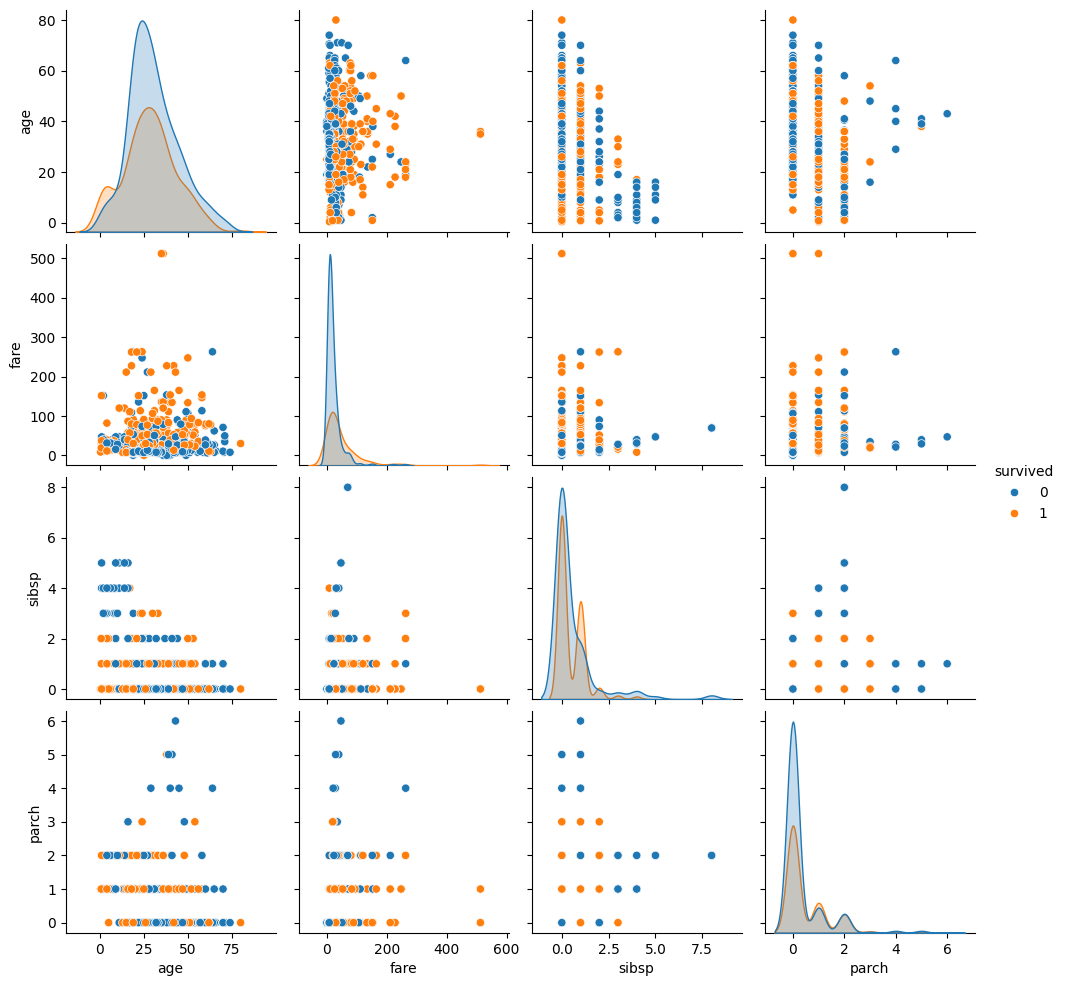

In [62]:
a=sns.pairplot(titanic[["age","fare","sibsp","parch","survived"]], hue="survived")
plt.show()

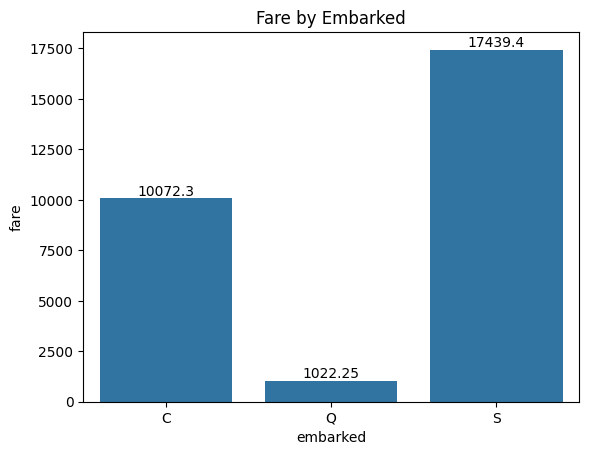

In [5]:
y=titanic.groupby("embarked")["fare"].sum().reset_index()
a=sns.barplot(data=y,x="embarked",y="fare")
plt.bar_label(a.containers[0])
plt.title("Fare by Embarked")
plt.show()

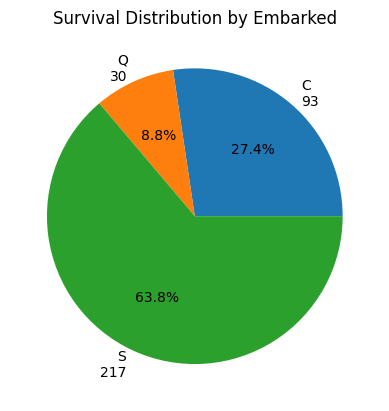

In [6]:
# Sum survived by embarked
survived_sum = titanic.groupby("embarked")["survived"].sum()
# Create labels with values
labels = [f"{embark}\n{value}" for embark, value in zip(survived_sum.index, survived_sum.values)]

# Pie chart
plt.pie(survived_sum,labels=labels,autopct='%1.1f%%')
plt.title("Survival Distribution by Embarked")
plt.show()


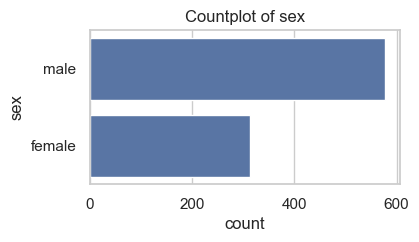

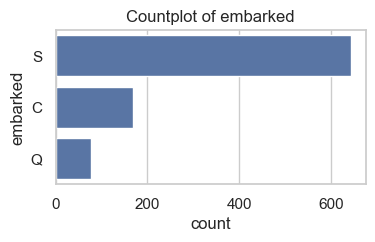

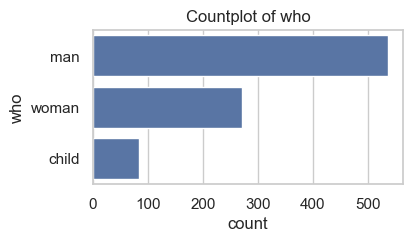

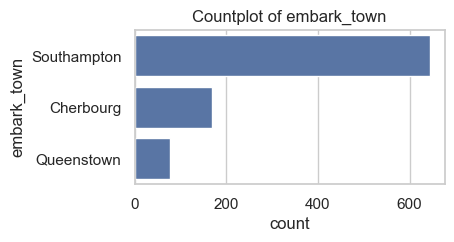

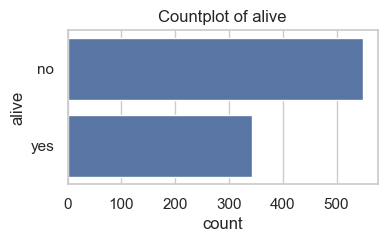

In [25]:
cat_cols = titanic.select_dtypes(include="object").columns
cat_cols
for col in cat_cols:
    plt.figure(figsize=(4,2))
    sns.countplot(y=col, data=titanic) 
    plt.title(f"Countplot of {col}")
    plt.show()


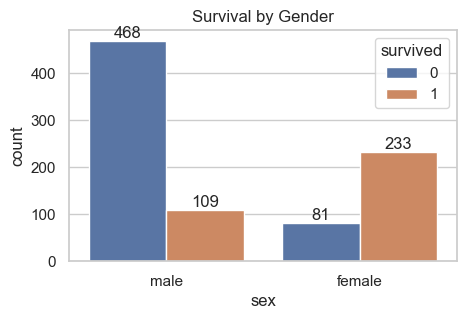

survived,0,1
sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [46]:
plt.figure(figsize=(5,3))
a=sns.countplot(x="sex", hue="survived", data=titanic)
plt.title("Survival by Gender")
plt.bar_label(a.containers[0])
plt.bar_label(a.containers[1])
plt.show()
pd.crosstab(titanic['sex'], titanic['survived'], normalize='index')



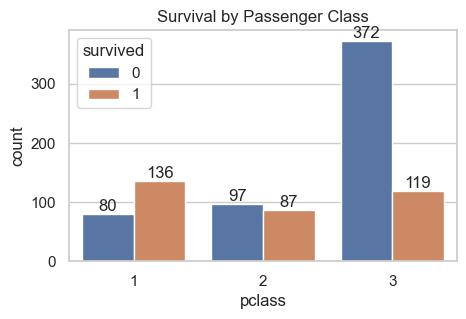

In [38]:
plt.figure(figsize=(5,3))
a=sns.countplot(x="pclass", hue="survived", data=titanic)
plt.title("Survival by Passenger Class")
plt.bar_label(a.containers[0])
plt.bar_label(a.containers[1])
plt.show()


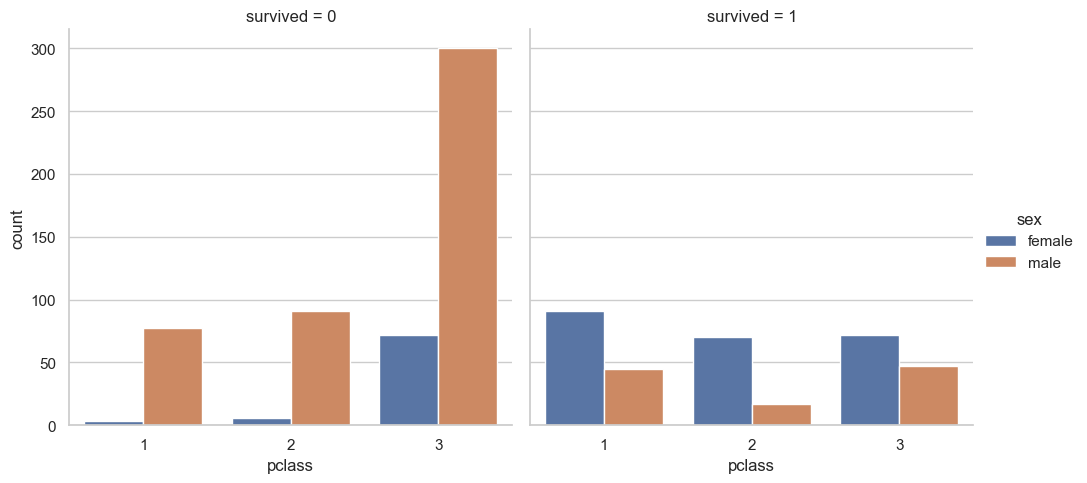

In [49]:
sns.catplot(data=titanic,x="pclass",col="survived",kind="count",hue="sex")
plt.show()


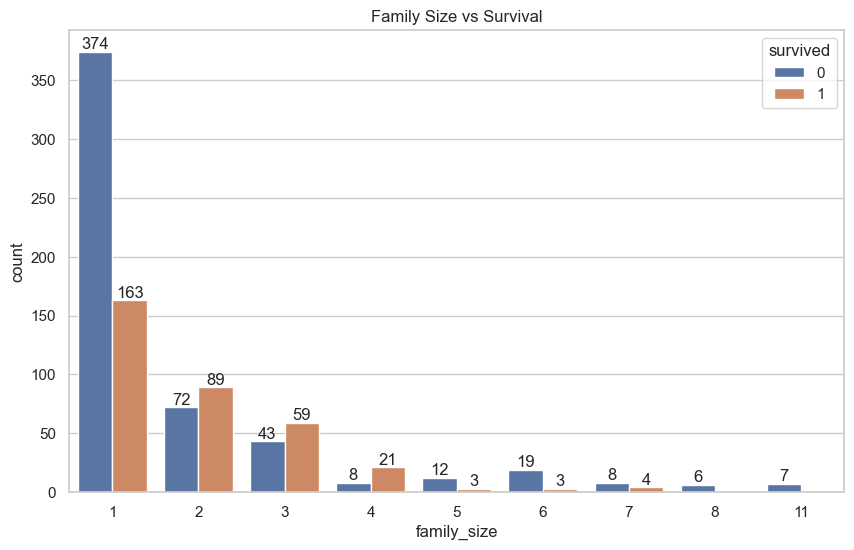

In [54]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
a=sns.countplot(x="family_size", hue="survived", data=titanic)
plt.title("Family Size vs Survival")
plt.bar_label(a.containers[0])
plt.bar_label(a.containers[1])
plt.show()
